## Programming for Data Analytics Project
### Contact Centre Key Performance Indicators

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from IPython.display import Image

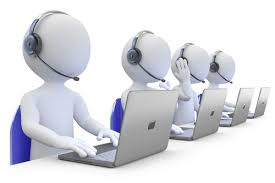

In [12]:
Image("Callpic.jpg") #load call centre image

### Contact Center
Contact centers offer omnichannel customer support for a nuber of different services including email, chat, voice over IP (VoIP) and website support. In this notebook, data is generated to simulate key performance indicators (KPI's) associated with monthly incoming voice communication. A key performance indicator is a measurable value that shows how effective an organisation is in achieving key business objectives. Simulated contact center communication data for this notebook is generated via the numpy random.poisson distribution. The Poisson distribution, named after French mathematician S. D. Poisson, is a statistical distribution showing the likely number of times that an event will occur within a specified period of time.(1) Various research articles on the Poisson distribution show how suitable it is at simulating the arrivals at a facility within a set period of time. I have chosen this distribution for simulation of the arrival of calls to a contact centre on a monthly basis. 

### Contact Center Key Performance Indicators

#### Average Time in Queue 
In order to ensure a customer's wait time is within an acceptable range, management need to keep track of average time in queue. This KPI is the total time callers wait in call queues divided by the total number of calls answered by agents. It is a great indicator of whether or not your team is providing their callers with the service they deserve.(2) From my research, I have found that this measure is closely related to customer satisfaction. In everyday business, no customer likes to wait for a long time to buy groceries or to order food. Customers are unlikely to return if they leave without being served. This logic also applies to contact canter customers. Average waiting time must be kept to a minimum in order to achieve customer satisfaction targets. Numpy random.poisson has been set at 15 seconds for the purpose of this exercise, which generates data typical of contact centers.

#### Abandoned Calls
This is the number of callers that hang up before an agent answers. Calls can be abandoned for different reasons. I have centered the generation of the random poisson number around a mean of 320. This number will be used in calculation of the Abandonment rate and should give a higher than average rate.

#### Abandonment Rate
Call abandonment is the percentage of callers who hang up before reaching an agent. This is a common occurrence in a call center and has a detrimental impact on customer retention. (2) From research, I have learned that call center management need to keep a close eye on abandonment rate as an a high rate can  adversely affect the caller satisfaction rate. The global metric (3) for Abandonment Rate in a contact center is between 5% – 8%. The metric is calculated by dividing the number of Abandoned Calls by the Total Incoming call number. 

#### Service Level
Service level is the percentage of calls answered within a specified timeframe. The global metric (3) for Service Level in contact centers is 80% of calls answered within 20 seconds. I have simulated a service level range of values between 50% - 84% in this notebook by setting Numpy random.poisson mean value to 65. 

#### Average Handle Time
Average handle time is the average amount of time in minutes that the call center team takes to resolve a problem. How agent time is spent is really important from a call center management perspective. It gives an insight into the efficiency of the team and is directly related to caller satisfaction. A manager meeds to keep a close eye on progress and strive to improve efficiency. It is derived by calculating the total time spent handling cases and dividing it by the total number of cases resolved. Handlimg time includes any time an agent spends working to resolve a partcular case and includes emails, research, solution identification and resolution. 


#### emails/ Availability/ Number of Agents
The number of emails, agent availability and number of agents values have been randomly chosen.

#### Occupancy Rate
Occupancy rate measures the amount of time agents are on live calls as well as completing work associated with the calls.(2)

#### First Call Resolution
First call resolution FCR measures the percentage of customer calls that are resolved the first time. Calculation:- Number of FCR calls / Total Number of Calls

#### Customer Satisfaction
Customer satisfaction is a KPI that is usually acquired from many different sources. This is usually done by combining quarterly customer survey  results with quality assurance measurements. The global metric (3)for customer satisfaction is 90%. For this project, I have chosen to randomly generate the customer satisfaction figure by setting Numpy random.poisson to 80. This typically results in a range of values between 40 and 99.   
 


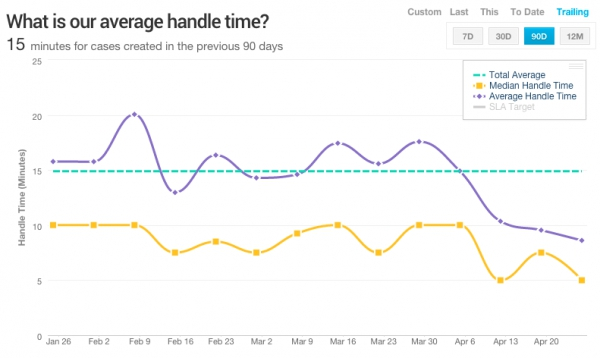

In [203]:
Image("Avg.png") #load call centre Average Hand Time

In [169]:
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,SpdAns,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-01-31,3605,21,324,8.987517,67,53,9,493,250,350,71.0,51,65
2006-02-28,3682,15,292,7.930473,70,84,11,475,224,333,67.0,53,77
2006-03-31,3542,15,315,8.893281,55,56,11,472,223,339,66.0,50,86
2006-04-30,3673,14,332,9.038933,54,58,26,494,269,301,89.0,55,69
2006-05-31,3455,10,310,8.972504,70,67,16,474,261,364,72.0,52,77


#### Simulate date
Date column data is simulated using Pandas function date_range, with a monthly frequency and 150 periods.

In [172]:
rng = pd.date_range('1/1/2006', periods = 150, freq = 'M')
rng

DatetimeIndex(['2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31',
               ...
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30'],
              dtype='datetime64[ns]', length=150, freq='M')

#### Simulate Call Center data 
Initiate a Pandas DataFrameData and populate with simulated data. for call center is drawn from the Numpy ramdom poisson distribution. Dates from rng are used as index values. 

In [237]:
Calls = pd.DataFrame(np.random.poisson(3617, len(rng)), index=rng, columns = ["Calls"]) # set mean incoming call value = 3617
Calls["Avg_Q"] = pd.DataFrame.assign(np.random.poisson(15, len(rng))) # set mean for Average time in Q =  15 mins
Calls["Aband"] = pd.DataFrame.assign(np.random.poisson(320, len(rng))) # mean value for Abandoned calls = 320
Calls["Aband_Rate"] = pd.DataFrame.assign((Calls.Aband / Calls.Calls)*100).apply(np.round) # calculate Abandonment rate
Calls["ServLev"] = pd.DataFrame.assign(np.random.poisson(65, len(rng))) # mean service level value = 65
Calls["AvgHand"] = pd.DataFrame.assign(np.random.poisson(15, len(rng))) # mean value for Average Handling = 15 mins
Calls["eMails"] = pd.DataFrame.assign(np.random.poisson(500, len(rng))) # mean number of emails per day is 500
Calls["NumAgent"] = pd.DataFrame.assign(np.random.poisson(241, len(rng))) # number of agents varies on a daily basis
Calls["Avail"] = pd.DataFrame.assign(np.random.poisson(347, len(rng))) # mean agent availability = 347
Calls["Ocup%"] = pd.DataFrame.assign((Calls.NumAgent / Calls.Avail)*100).apply(np.round) # calculate % occupancy and round
Calls["Fcr%"] =  pd.DataFrame.assign(np.random.poisson(50, len(rng))) # First call resolution mean = 50
Calls["Sfact"] =  pd.DataFrame.assign(np.random.poisson(70, len(rng))) # Caller satisfaction rate mean val = 70
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-01-31,3685,23,321,9.0,55,12,492,214,372,58.0,49,65
2006-02-28,3538,14,293,8.0,57,16,561,254,337,75.0,49,65
2006-03-31,3757,11,350,9.0,68,13,493,206,330,62.0,65,86
2006-04-30,3491,11,316,9.0,67,14,522,239,366,65.0,52,66
2006-05-31,3659,14,307,8.0,58,7,473,236,366,64.0,49,71


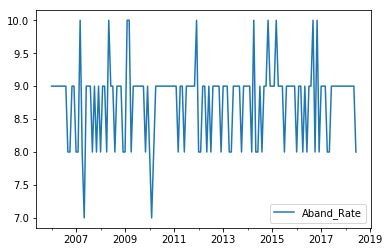

In [232]:
#Calls.iloc[100:140].plot(y=['Sfact','Aband'], use_index=True)
Calls.plot(y=['Aband_Rate'], use_index=True)

In [234]:
Calls.describe().astype(int)

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
count,150,150,150,150,150,150,150,150,150,150,150,150
mean,3617,14,317,8,65,15,499,241,344,70,50,68
std,61,3,17,0,7,3,21,15,19,6,7,9
min,3447,4,274,7,41,6,436,199,299,55,32,46
25%,3582,12,307,8,61,12,486,231,328,65,46,63
50%,3619,15,319,9,65,15,500,242,347,70,51,68
75%,3656,18,329,9,70,17,513,252,359,74,55,74
max,3779,23,369,10,94,25,568,285,390,86,68,93


In [230]:
Calls.loc['2017-11-30':'2018-05-31']

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2017-11-30,3614,16,312,8.633094,59,7,466,240,324,74.0,53,61
2017-12-31,3543,17,328,9.257691,68,17,474,253,349,72.0,48,75
2018-01-31,3669,16,305,8.312892,65,14,494,231,353,65.0,41,70
2018-02-28,3638,19,304,8.356240,68,11,505,247,339,73.0,37,73
2018-03-31,3676,16,326,8.868335,55,18,501,253,359,70.0,47,99
2018-04-30,3558,15,329,9.246768,76,15,521,235,367,64.0,53,82
2018-05-31,3622,7,312,8.614025,66,18,492,211,361,58.0,58,67


In [178]:
Calls.loc['2017-11-30':'2018-05-31'].mean().astype(int)

Calls         3618
Avg_Q           16
Aband          313
Aband_Rate       8
ServLev         62
AvgHand         13
eMails         493
NumAgent       253
Avail          353
Ocup%           71
Fcr%            53
Sfact           71
dtype: int32

In [179]:
Calls.resample('Y').mean().astype(int)

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-12-31,3611,14,310,8,67,15,498,238,342,70,49,68
2007-12-31,3621,14,322,8,66,16,500,243,360,67,48,71
2008-12-31,3623,15,320,8,64,17,498,239,353,67,50,70
2009-12-31,3616,16,316,8,65,15,518,234,345,68,51,72
2010-12-31,3608,15,316,8,62,13,498,240,346,69,49,72
2011-12-31,3617,16,333,9,68,16,490,239,348,68,52,68
2012-12-31,3621,13,321,8,61,15,507,241,354,68,49,67
2013-12-31,3621,15,325,8,64,15,498,237,339,70,48,66
2014-12-31,3611,15,323,8,61,15,494,237,343,69,52,69
2015-12-31,3581,15,325,9,64,14,505,236,353,67,48,71


In [180]:
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70


In [181]:
Temp = Calls.loc[Calls['Avg_Q'] <= 22]
Temp.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70


### Greater or equal to !!!  Really GOOD!!!!!!!

In [182]:
Calls.loc[Calls.Aband <= 50, 'Aband50?'] = 'True' 
Calls.loc[Calls.Aband > 50, 'Aband50?'] = 'False' 
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact,Aband50?
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66,False
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62,False
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66,False
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73,False
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70,False


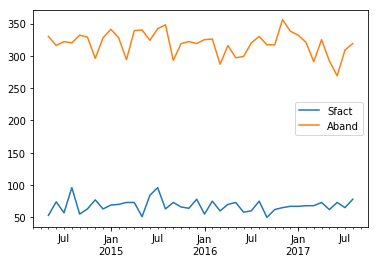

In [183]:
Calls.iloc[100:140].plot(y=['Sfact','Aband'], use_index=True)

In [184]:
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact,Aband50?
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66,False
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62,False
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66,False
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73,False
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70,False


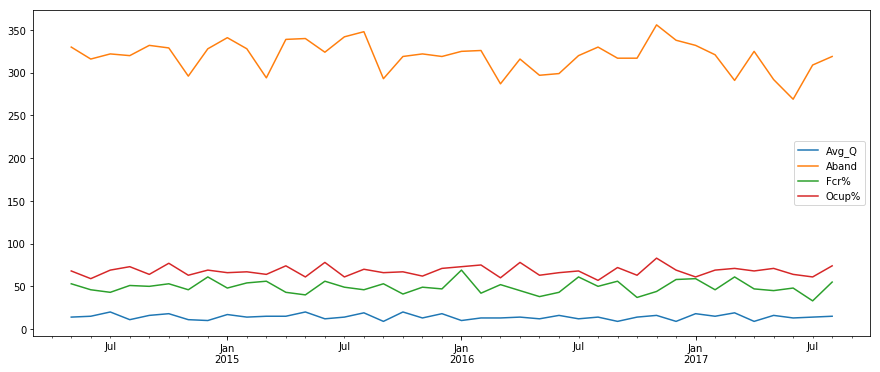

In [185]:
#Calls.plot(y=['Avg_Wait','Aband', 'ServLev', 'SpdAns', 'Ocup %', 'Sfact'], use_index=True)
Calls.iloc[100:140].plot(y=['Avg_Q','Aband', 'Fcr%', 'Ocup%'], use_index=True, figsize=(15,6))

### True/False Hue really good for SLA.......

In [186]:
#Calls.loc[Calls.Sfact <= 75, 'Cust Satisfied?'] = 'True' 
#Calls.loc[Calls.Sfact > 75, 'Cust Satisfied?'] = 'False' 
#Calls.head()

In [187]:
Calls1 = Calls.loc[:, 'eMails':'Ocup%']
Calls1.head()

,eMails,NumAgent,Avail,Ocup%
2006-01-31,525,240,348,69.0
2006-02-28,515,256,327,78.0
2006-03-31,512,251,321,78.0
2006-04-30,511,227,370,61.0
2006-05-31,523,225,326,69.0


In [188]:
df= Calls.loc[:, ['Calls', 'Aband']]
df.head()

,Calls,Aband
2006-01-31,3550,295
2006-02-28,3466,332
2006-03-31,3702,323
2006-04-30,3641,326
2006-05-31,3642,341


### Customer Satisfaction !!!!!!!!!!!!

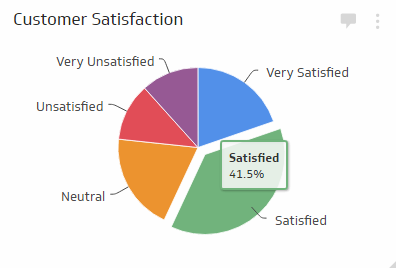

In [189]:
Image("CustSatisf.png")

In [190]:
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact,Aband50?
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66,False
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62,False
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66,False
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73,False
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70,False


In [191]:
Calls.loc[Calls.Sfact >= 80, 'Cust_Rating'] = 'Very Satisfied' 
Calls.loc[Calls.Sfact < 80, 'Cust_Rating'] ='Satisfied'
Calls.loc[Calls.Sfact < 75, 'Cust_Rating'] = 'Neutral' 
Calls.loc[Calls.Sfact < 70, 'Cust_Rating'] = 'Unsatisfied' 
Calls.loc[Calls.Sfact < 60, 'Cust_Rating'] = 'Vey Unsatisfied' 
Calls.head()

,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact,Aband50?,Cust_Rating
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66,False,Unsatisfied
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62,False,Unsatisfied
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66,False,Unsatisfied
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73,False,Neutral
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70,False,Neutral


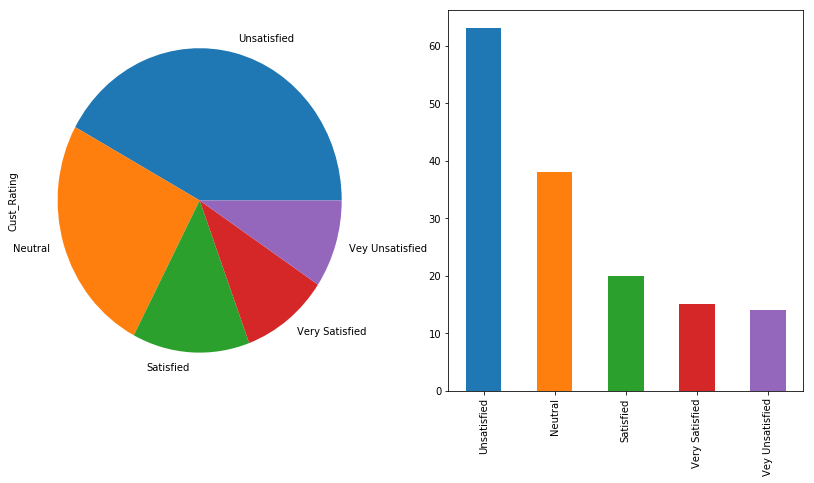

In [192]:
df4 = Calls['Cust_Rating'].value_counts()
plt.subplot(1,2,1)
df4.plot.pie(figsize=(14,7));

plt.subplot(1,2,2)
df4.plot.bar(figsize=(14,7));

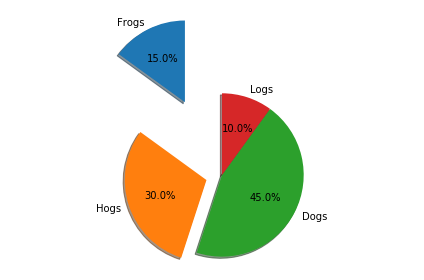

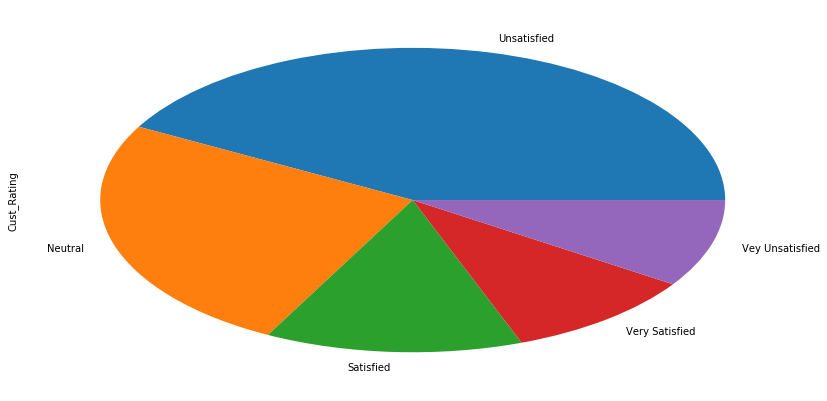

In [193]:
# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (1, 0.2, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

df4 = Calls['Cust_Rating'].value_counts()
explode = (1, 0.2, 0, 0)  
df4.plot.pie(figsize=(14,7));

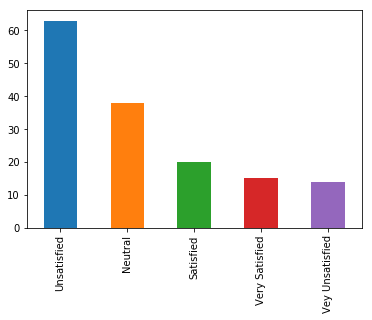

In [194]:
df4.plot.bar();

In [195]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
plt.show()

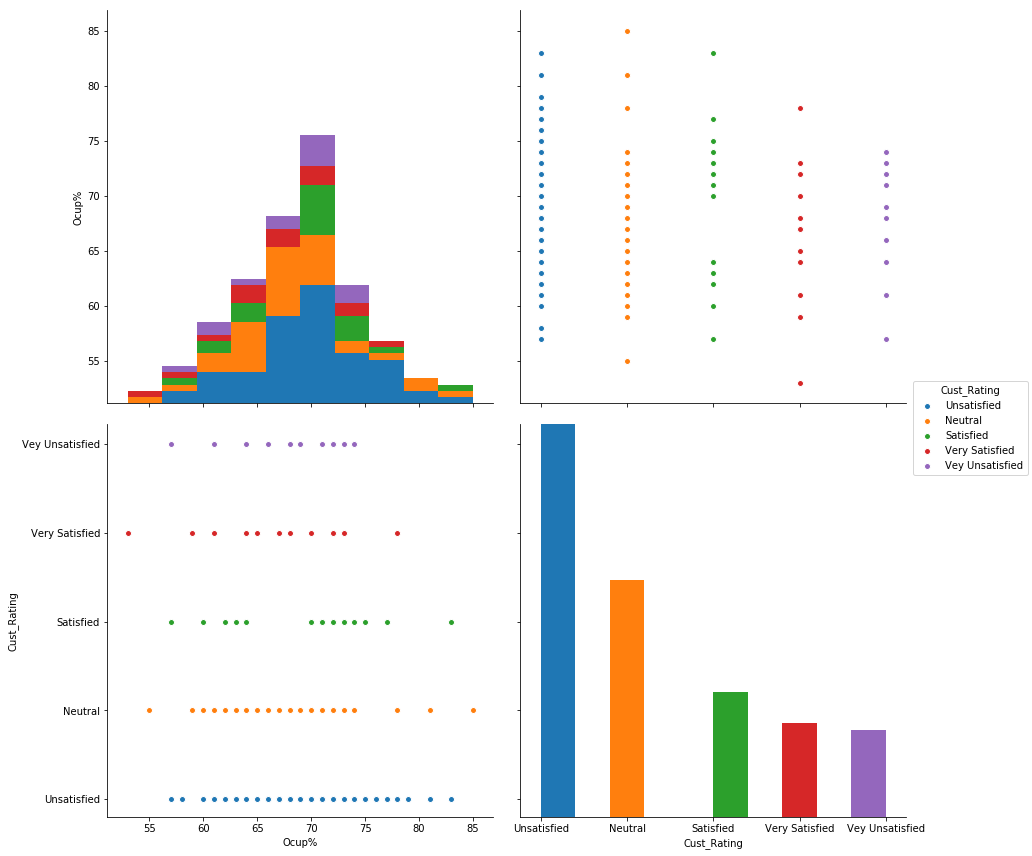

In [196]:
import seaborn as sns
sns.pairplot(Calls, hue='Cust_Rating', vars=['Ocup%', 'Cust_Rating'], size = 6)

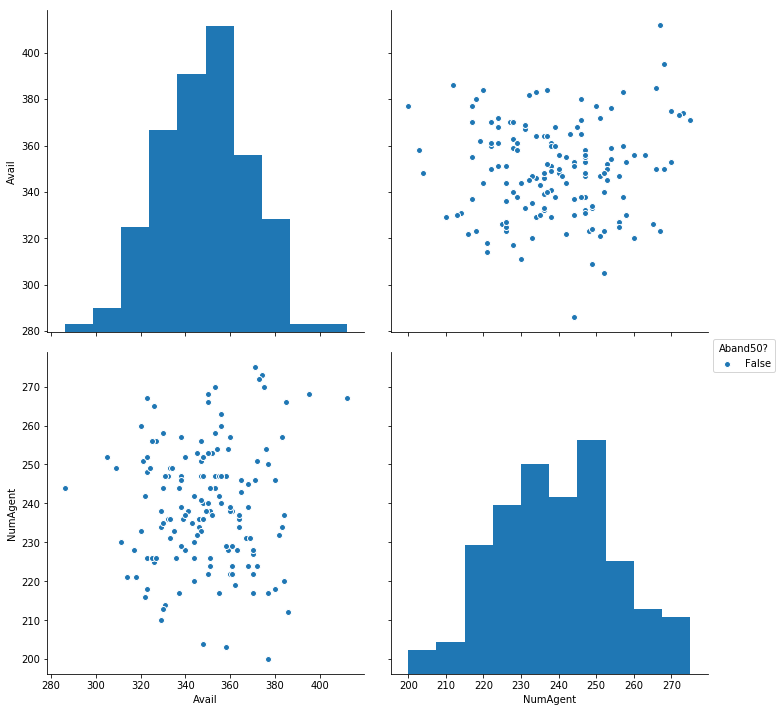

In [197]:
import seaborn as sns
sns.pairplot(Calls, hue='Aband50?', vars=['Avail', 'NumAgent'], size = 5)

### Vertical Count Plot

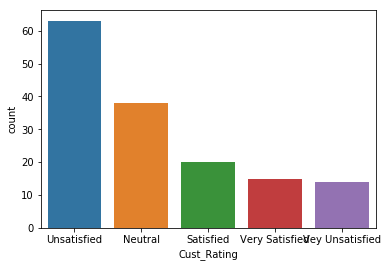

In [198]:
from seaborn import countplot
from matplotlib.pyplot import figure, show


figure()
countplot(data=Calls,x='Cust_Rating')
show()

### Horizontal Count Plot

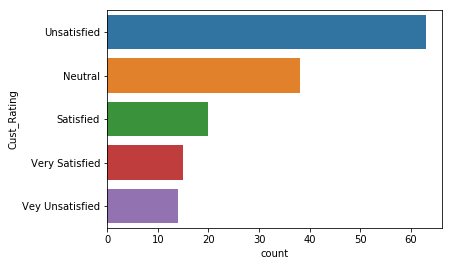

In [199]:
figure()
countplot(data=Calls,y='Cust_Rating')
show()

In [200]:
Calls.head()


,Calls,Avg_Q,Aband,Aband_Rate,ServLev,AvgHand,eMails,NumAgent,Avail,Ocup%,Fcr%,Sfact,Aband50?,Cust_Rating
2006-01-31,3550,19,295,8.309859,66,8,525,240,348,69.0,49,66,False,Unsatisfied
2006-02-28,3466,18,332,9.578765,71,14,515,256,327,78.0,44,62,False,Unsatisfied
2006-03-31,3702,8,323,8.725014,73,13,512,251,321,78.0,50,66,False,Unsatisfied
2006-04-30,3641,19,326,8.953584,60,12,511,227,370,61.0,48,73,False,Neutral
2006-05-31,3642,19,341,9.362987,63,23,523,225,326,69.0,53,70,False,Neutral


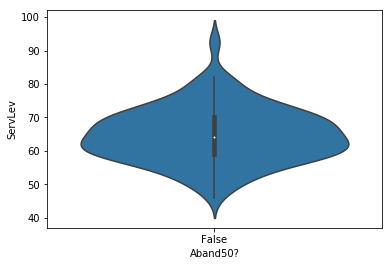

In [201]:
sns.violinplot(x='Aband50?', y='ServLev', data=Calls)

1. Poisson distribution https://www.investopedia.com/terms/p/poisson-distribution.asp
2. Call Center KPI's  https://www.talkdesk.com/blog/12-call-center-kpis-to-track-for-success/ 
3. Call Center - Global best practices https://www.ifc.org/wps/wcm/connect/75ce96004cf85d4f8752c7f81ee631cc/Tool+9.4.+Measuring+Call+Center+Performance.pdf?MOD=AJPERES


